In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
datapath = "D:\\Developments\\belle-2-napoli-hardware\\data\\tesi\\"

In [8]:
ls $datapath

 Il volume nell'unit… D Š Data
 Numero di serie del volume: 7009-8AD6

 Directory di D:\Developments\belle-2-napoli-hardware\data\tesi

28/08/2023  17:44    <DIR>          .
28/08/2023  17:44    <DIR>          ..
28/08/2023  22:24       264.430.046 20230828-1743_BGO_2SIPM_no-filtri_trigger_ext.txt
               1 File    264.430.046 byte
               2 Directory  1.969.266.827.264 byte disponibili


In [5]:
data_sotto = pd.read_csv(datapath+'BGO_2SIPM_UG1-sotto.txt', sep=" ", header=None, names=["frame", "x1", "y1", "x2", "y2"]).dropna()

In [6]:
data_sopra = pd.read_csv(datapath+'BGO_2SIPM_UG1-sopra.txt', sep=" ", header=None, names=["frame", "x1", "y1", "x2", "y2"]).dropna()

In [7]:
data_sotto

,frame,x1,y1,x2,y2
0,1.0,-0.000001,-0.0008,-0.000001,-4.000000e-03
1,1.0,-0.000001,-0.0004,-0.000001,5.551115e-17
2,1.0,-0.000001,-0.0008,-0.000001,-4.000000e-03
3,1.0,-0.000001,-0.0004,-0.000001,-4.000000e-03
4,1.0,-0.000001,-0.0008,-0.000001,-4.000000e-03
...,...,...,...,...,...
1097595,392.0,0.000001,0.0000,0.000001,5.551115e-17
1097596,392.0,0.000001,-0.0008,0.000001,5.551115e-17
1097597,392.0,0.000001,-0.0008,0.000001,5.551115e-17
1097598,392.0,0.000001,-0.0008,0.000001,-4.000000e-03


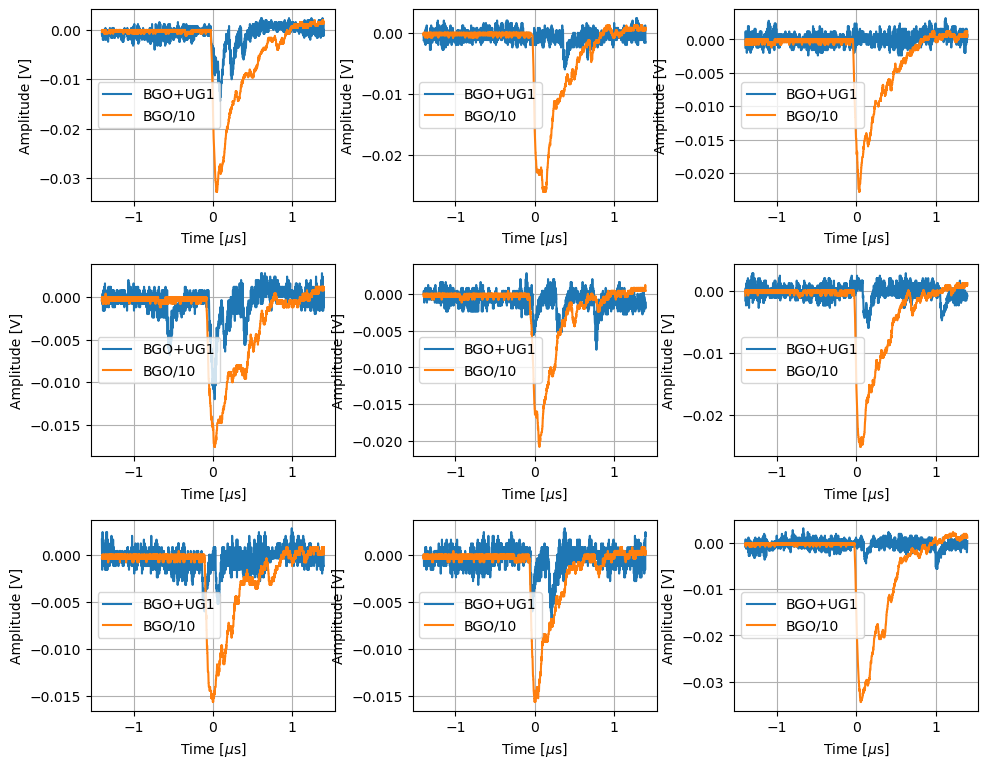

In [9]:
df = data_sotto
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.x1*1E6, d.y1, label='BGO+UG1')
    axs[i][j].plot(d.x2*1E6, d.y2/10, label='BGO/10')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [V]')#, size=14)
    axs[i][j].grid()
    axs[i][j].legend()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


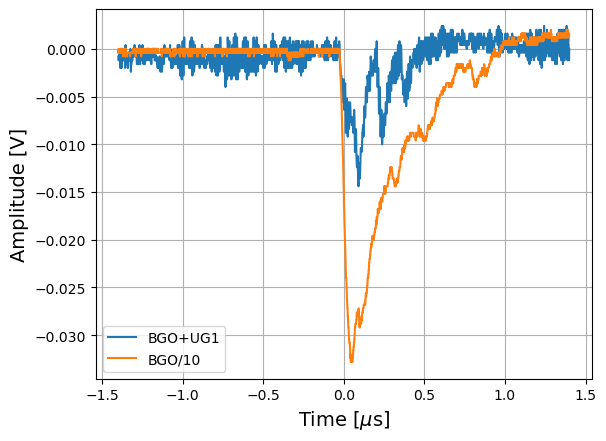

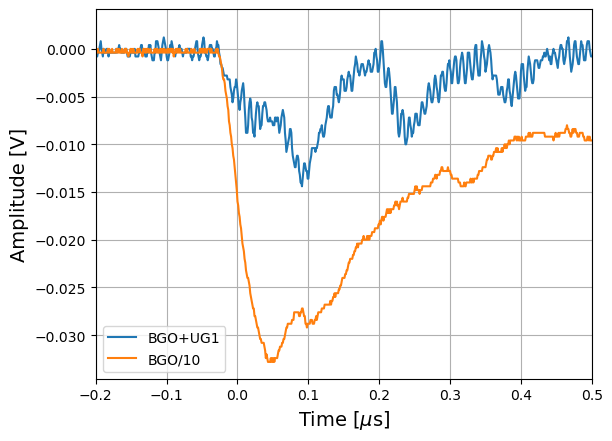

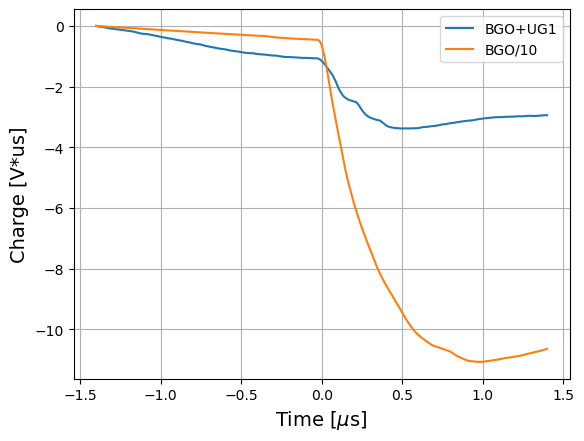

In [10]:
F = 2

#%matplotlib widget
fig = plt.figure()

for frame in [F]:
    d = df.query(f'frame=={frame}')
    plt.plot(d.x1*1E6, d.y1, label='BGO+UG1')
    plt.plot(d.x1*1E6, d.y2/10, label='BGO/10')
    plt.grid()
    plt.legend()
    plt.xlabel(r'Time [$\mu$s]', size=14)
    plt.ylabel('Amplitude [V]', size=14)
    #plt.xlim(-0.2, 1.8)
    plt.show()

#%matplotlib widget
fig = plt.figure()

for frame in [F]:
    d = df.query(f'frame=={frame}')
    plt.plot(d.x1*1E6, d.y1, label='BGO+UG1')
    plt.plot(d.x1*1E6, d.y2/10, label='BGO/10')
    plt.grid()
    plt.legend()
    plt.xlabel(r'Time [$\mu$s]', size=14)
    plt.ylabel('Amplitude [V]', size=14)
    plt.xlim(-0.2, 0.5)
    plt.show()

#%matplotlib widget
fig = plt.figure()

for frame in [F]:
    d = df.query(f'frame=={frame}')
    plt.plot(d.x1*1E6, d.y1.cumsum(), label='BGO+UG1')
    plt.plot(d.x1*1E6, d.y2.cumsum()/10, label='BGO/10')
    plt.grid()
    plt.legend()
    plt.xlabel(r'Time [$\mu$s]', size=14)
    plt.ylabel('Charge [V*us]', size=14)
    #plt.xlim(-0.2, 1.8)
    plt.show()

In [28]:
3500*16

56000

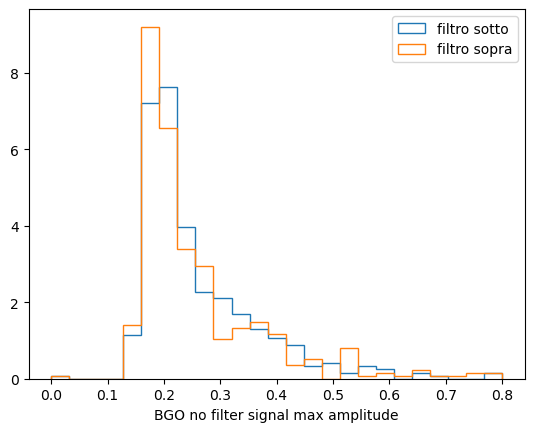

In [12]:
df = data_sotto
CH2 = []
CH1 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.y2))]
    CH1+=[np.max(np.abs(d.y1))]
plt.hist(CH2, bins=25, range=[0, 0.8], density=True, histtype='step', label='filtro sotto')


df = data_sopra
CH2 = []
CH1 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.y2))]
    CH1+=[np.max(np.abs(d.y1))]
plt.hist(CH2, bins=25, range=[0, 0.8], density=True, histtype='step', label='filtro sopra')


plt.legend()
#plt.yscale('log')
plt.xlabel('BGO no filter signal max amplitude')
plt.show()

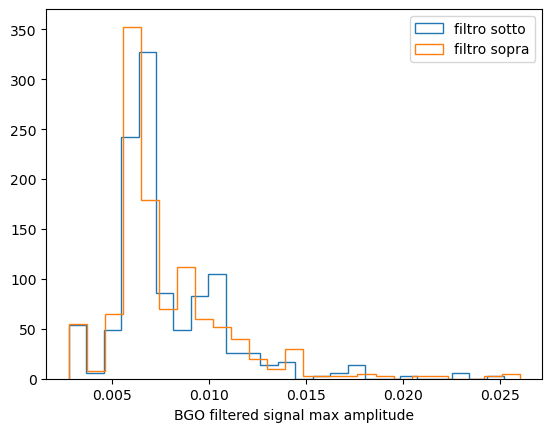

In [13]:
df = data_sotto
CH2 = []
CH1 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.y2))]
    CH1+=[np.max(np.abs(d.y1))]
plt.hist(CH1, bins=25, density=True, histtype='step', label='filtro sotto')


df = data_sopra
CH2 = []
CH1 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.y2))]
    CH1+=[np.max(np.abs(d.y1))]
plt.hist(CH1, bins=25, density=True, histtype='step', label='filtro sopra')


plt.legend()
#plt.yscale('log')
plt.xlabel('BGO filtered signal max amplitude')
plt.show()

In [14]:
df = data_sopra
CH2 = []
CH1 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.y2))]
    CH1+=[np.max(np.abs(d.y1))] 
plt.scatter(CH1, CH2, label='filtro sopra')

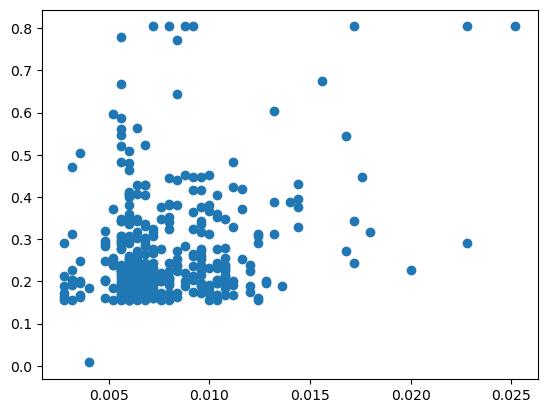

In [15]:
df = data_sotto
CH2 = []
CH1 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.y2))]
    CH1+=[np.max(np.abs(d.y1))] 
plt.scatter(CH1, CH2, label='filtro sotto')

In [27]:
np.array([1, 2]) + np.array([1, 1])

array([2, 3])

In [24]:
for f in data_sotto.frame.unique():
    SUM.query('frame==3').x1*1E6

5600   -1.400
5601   -1.399
5602   -1.398
5603   -1.397
5604   -1.396
        ...  
8395    1.395
8396    1.396
8397    1.397
8398    1.398
8399    1.399
Name: x1, Length: 2800, dtype: float64

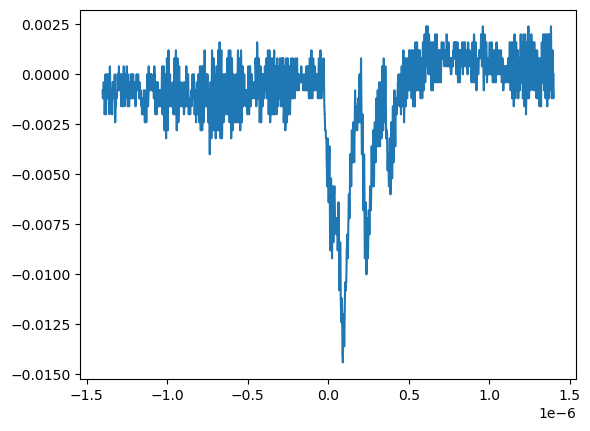

In [21]:
plt.plot(data_sotto.query('frame==2').x1, data_sotto.query('frame==2').y1)